#Global Superstore Analysis

## 1. Problem Statement & Objective

###Problem Statement:
Analyze sales, profit, and performance of the Global Superstore across regions, categories, sub-categories, and customers to gain actionable business insights.

###Objective:

#####a. Measure total sales and profit

#####b. Identify high-performing regions, categories, and sub-categories

#####c. Highlight top customers

#####d. Build predictive insights (forecast sales/profit)

#####e. Prepare an interactive dashboard for decision-making

##2. Dataset Selection and Loading

In [6]:
# For Google Colab
from google.colab import files
import pandas as pd

print("Upload your dataset (CSV or Excel format):")
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the dataset based on file type
if file_name.endswith('.csv'):
    df = pd.read_csv(file_name, encoding='latin-1')
elif file_name.endswith(('.xls', '.xlsx')):
    df = pd.read_excel(file_name)
else:
    raise ValueError("Unsupported file type")

# Show dataset info and first few rows
print("Dataset Shape:", df.shape)
df.head()

Upload your dataset (CSV or Excel format):


Saving Global_Superstore2.csv to Global_Superstore2 (1).csv
Dataset Shape: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


##3. Data Cleaning and Preprocessing

In [8]:
if df is not None:
    # Check missing values
    print("Missing values per column:\n", df.isnull().sum())

    # Fill missing Postal Codes with 0
    if 'Postal Code' in df.columns:
        df['Postal Code'] = df['Postal Code'].fillna(0)

    # Convert dates with day-first parsing
    for col in ['Order Date', 'Ship Date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], dayfirst=True)

    # Remove duplicates
    df = df.drop_duplicates()

    # Show descriptive statistics
    display(df.describe())


Missing values per column:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36293.500000,2013-04-30 19:20:02.401440768,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896,23.831678
min,31297.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,33795.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,1.490000
50%,36293.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,38791.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,19.985000
max,41290.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,58.962848


##4. Exploratory Data Analysis (EDA)

Total Sales: $2,297,200.86
Total Profit: $286,397.02


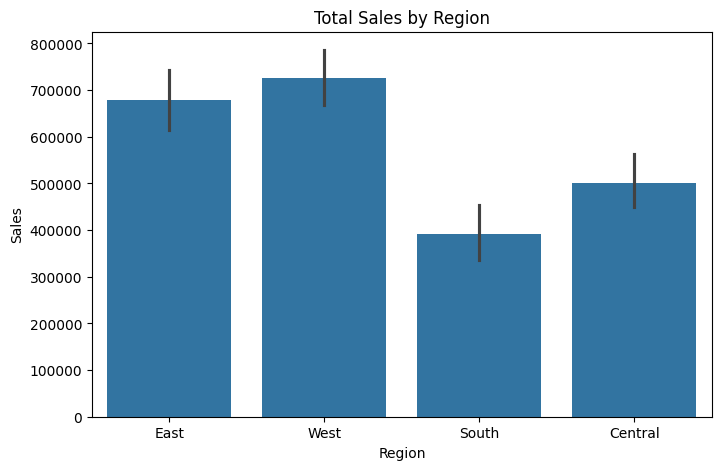

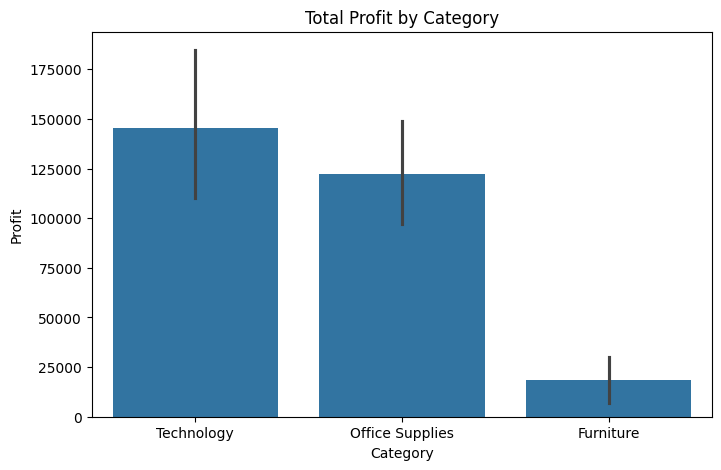

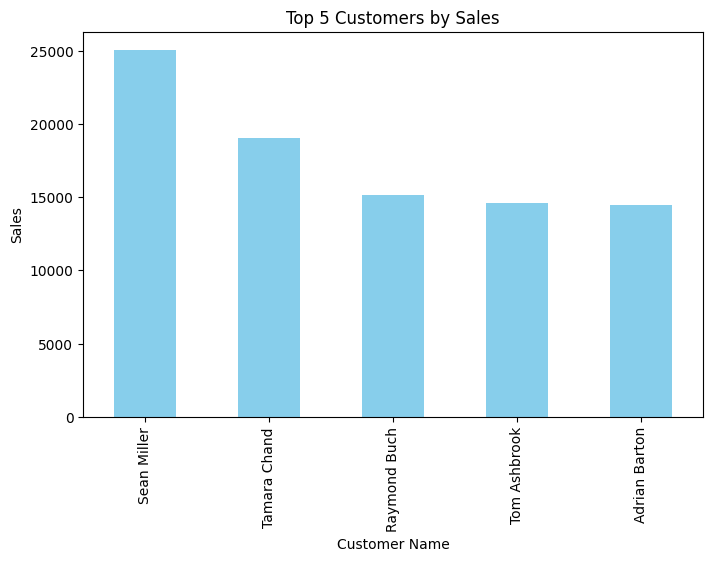

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Total Sales and Profit
    total_sales = df['Sales'].sum()
    total_profit = df['Profit'].sum()
    print(f"Total Sales: ${total_sales:,.2f}")
    print(f"Total Profit: ${total_profit:,.2f}")

    # Sales by Region
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
    plt.title('Total Sales by Region')
    plt.show()

    # Profit by Category
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x='Category', y='Profit', estimator=sum)
    plt.title('Total Profit by Category')
    plt.show()

    # Top 5 Customers by Sales
    top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,5))
    top_customers.plot(kind='bar', color='skyblue', title='Top 5 Customers by Sales')
    plt.ylabel('Sales')
    plt.show()


##5. Model Building and Evaluation

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

if df is not None:
    # Predict Profit based on Sales
    X = df[['Sales']]
    y = df['Profit']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 42184.16
R2 Score: 0.02


##6. Visualizations (Charts, Plots, Graphs)

In [11]:
import plotly.express as px

if df is not None:
    # Sales by Region
    fig_region = px.bar(df.groupby('Region')['Sales'].sum().reset_index(),
                        x='Region', y='Sales', title='Sales by Region')
    fig_region.show()

    # Profit by Category
    fig_category = px.bar(df.groupby('Category')['Profit'].sum().reset_index(),
                          x='Category', y='Profit', color='Category', title='Profit by Category')
    fig_category.show()

    # Top Customers
    top_customers_df = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5).reset_index()
    fig_customers = px.bar(top_customers_df, x='Customer Name', y='Sales', title='Top 5 Customers by Sales')
    fig_customers.show()
